In [310]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import colour
import matplotlib.pyplot as plt
import os

In [311]:
# Сторонняя библиотека для нахождения колорчекера
from colour_checker_detection import detect_colour_checkers_inference, detect_colour_checkers_segmentation

In [312]:
REFERENCE_COLORS = np.array([
    [115, 82, 68],    # Темная кожа
    [194, 150, 130],  # Светлая кожа
    [98, 122, 157],   # Голубое небо
    [87, 108, 67],    # Листва
    [133, 128, 177],  # Синий цветок
    [103, 189, 170],  # Зелено-голубой
    [214, 126, 44],   # Оранжевый
    [80, 91, 166],    # Фиолетово-синий
    [193, 90, 99],    # Умеренно красный
    [94, 60, 108],    # Пурпурный
    [157, 188, 64],   # Желто-зеленый
    [224, 163, 46],   # Оранжево-желтый
    [56, 61, 150],    # Синий
    [70, 148, 73],    # Зеленый
    [175, 54, 60],    # Красный
    [231, 199, 31],   # Желтый
    [187, 86, 149],   # Пурпурно-розовый
    [8, 133, 161],    # Голубой
    [243, 243, 242],  # Белый
    [200, 200, 200],  # Нейтральный 8
    [160, 160, 160],  # Нейтральный 6.5
    [122, 122, 121],  # Нейтральный 5
    [85, 85, 85],     # Нейтральный 3.5
    [52, 52, 52]      # Черный
], dtype=np.float32)

In [313]:
# REFERENCE_SWATCHES_VALUES = colour.cctf_decoding(REFERENCE_COLORS / 255.0)

In [314]:
REFERENCE_SWATCHES_VALUES = REFERENCE_COLORS / 255.0

In [ ]:
image = colour.read_image('images/1.jpg')

c:\Users\mayor\AppData\Local\Programs\Python\Python312\Lib\site-packages\colour\utilities\verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028


In [316]:
image

array([[[ 0.7372549 ,  0.78039217,  0.64705884],
        [ 0.7372549 ,  0.78039217,  0.64705884],
        [ 0.7411765 ,  0.7764706 ,  0.654902  ],
        ..., 
        [ 0.84313726,  0.88235295,  0.74509805],
        [ 0.8666667 ,  0.90588236,  0.77254903],
        [ 0.87058824,  0.9098039 ,  0.7764706 ]],

       [[ 0.73333335,  0.7764706 ,  0.6431373 ],
        [ 0.73333335,  0.7764706 ,  0.6431373 ],
        [ 0.7411765 ,  0.7764706 ,  0.654902  ],
        ..., 
        [ 0.84705883,  0.8862745 ,  0.7490196 ],
        [ 0.87058824,  0.9098039 ,  0.7764706 ],
        [ 0.87058824,  0.9098039 ,  0.7764706 ]],

       [[ 0.73333335,  0.7764706 ,  0.6509804 ],
        [ 0.73333335,  0.7764706 ,  0.6509804 ],
        [ 0.7411765 ,  0.7764706 ,  0.654902  ],
        ..., 
        [ 0.85882354,  0.8862745 ,  0.7529412 ],
        [ 0.87058824,  0.9098039 ,  0.7764706 ],
        [ 0.8666667 ,  0.90588236,  0.77254903]],

       ..., 
       [[ 0.79607844,  0.8352941 ,  0.7019608 ],
        

In [317]:
colour_checker_data = detect_colour_checkers_segmentation(image, additional_data=True)
print(f"Найдено колорчекеров: {len(colour_checker_data)}")

Найдено колорчекеров: 1


<function matplotlib.pyplot.show(close=None, block=None)>

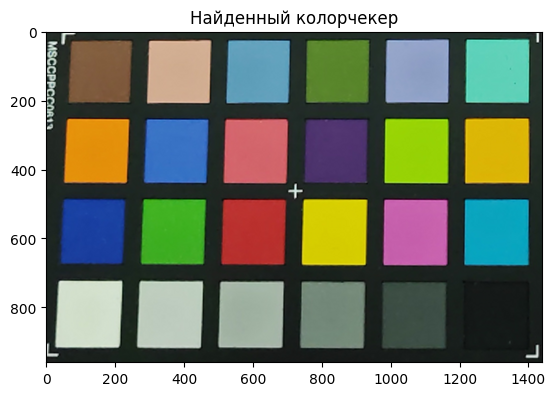

In [318]:
for i, checker in enumerate(colour_checker_data):
    plt.figure()
    plt.imshow(np.clip(checker.colour_checker, 0, 1))
    plt.title("Найденный колорчекер")
plt.show

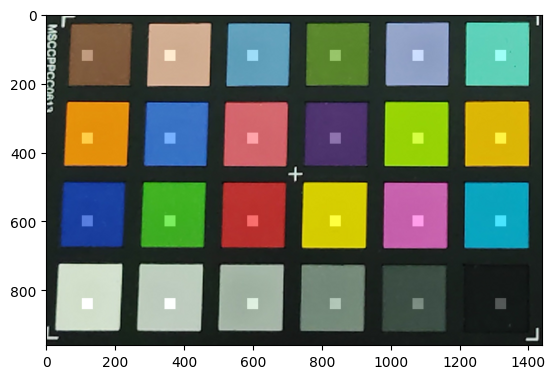

In [319]:
masks = colour_checker_data[0].swatch_masks
ch_image = colour_checker_data[0].colour_checker
masks_i = np.zeros(ch_image.shape)
for i, mask in enumerate(masks):
    masks_i[mask[0]:mask[1], mask[2]:mask[3], ...] = 1

plt.imshow(np.clip(ch_image + masks_i * 0.25, 0, 1))

In [320]:
measured_colors = colour_checker_data[0].swatch_colours

ccm, *_ = np.linalg.lstsq(
    measured_colors,
    REFERENCE_SWATCHES_VALUES,
    rcond=None
)

print(f"Вычисленная матрица цветокоррекции:\n{ccm}")

Вычисленная матрица цветокоррекции:
[[ 0.91541666  0.06165408  0.04022274]
 [ 0.09117542  0.8562746   0.1991166 ]
 [ 0.02384595 -0.00132213  0.7478247 ]]


In [321]:
def as_8_bit_image(image):
    return np.round(np.clip(image, 0, 1) * 255).astype(np.uint8)

In [322]:
image_shape = image.shape
image_reshaped = image.reshape([-1, 3])

corrected_image_reshaped = np.dot(image_reshaped, ccm)
corrected_image = corrected_image_reshaped.reshape(image_shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.07393e-05..1.02824].


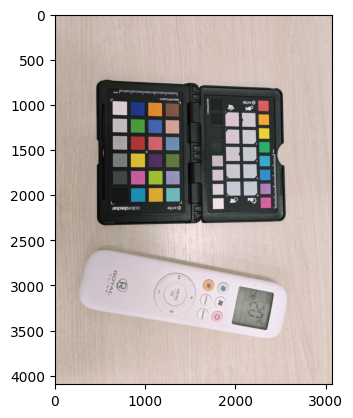

In [323]:
plt.imshow(corrected_image)